In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\train"
test_dir = r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test"

In [3]:
width = 500
height = 500

batch = 32

In [4]:
train_dataset = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
train_img = train_dataset.flow_from_directory(
    train_dir,
    target_size=(width, height), 
    batch_size=batch,
    class_mode="categorical"
)

Found 251 images belonging to 3 classes.


In [6]:
test_dataset = ImageDataGenerator(rescale=1/255.0)

In [7]:
test_img = test_dataset.flow_from_directory(
    test_dir,
    target_size=(width, height), 
    batch_size=batch,
    class_mode="categorical"
)

Found 66 images belonging to 3 classes.


In [8]:
train_img.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [9]:
classes = {val:key for key, val in train_img.class_indices.items()}

In [10]:
classes

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [13]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape=(width, height, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(52, activation="relu"),
    Dense(52, activation="relu"),
    Dense(3, activation="softmax")
])

In [15]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
history = model.fit(train_img, epochs=25, batch_size=batch, validation_data=test_img)

Epoch 1/25
8/8 [==============================] - 53s 7s/step - loss: 1.0417 - accuracy: 0.4821 - val_loss: 1.1181 - val_accuracy: 0.5000
Epoch 2/25
8/8 [==============================] - 50s 6s/step - loss: 0.8992 - accuracy: 0.5857 - val_loss: 1.3331 - val_accuracy: 0.5758
Epoch 3/25
8/8 [==============================] - 47s 6s/step - loss: 0.7007 - accuracy: 0.6932 - val_loss: 1.2078 - val_accuracy: 0.6061
Epoch 4/25
8/8 [==============================] - 43s 5s/step - loss: 0.8617 - accuracy: 0.6096 - val_loss: 0.9705 - val_accuracy: 0.6364
Epoch 5/25
8/8 [==============================] - 42s 5s/step - loss: 0.7488 - accuracy: 0.7211 - val_loss: 0.8616 - val_accuracy: 0.7273
Epoch 6/25
8/8 [==============================] - 42s 5s/step - loss: 0.6985 - accuracy: 0.7251 - val_loss: 1.1015 - val_accuracy: 0.5909
Epoch 7/25
8/8 [==============================] - 43s 5s/step - loss: 0.5675 - accuracy: 0.7610 - val_loss: 0.9675 - val_accuracy: 0.6212
Epoch 8/25
8/8 [==================

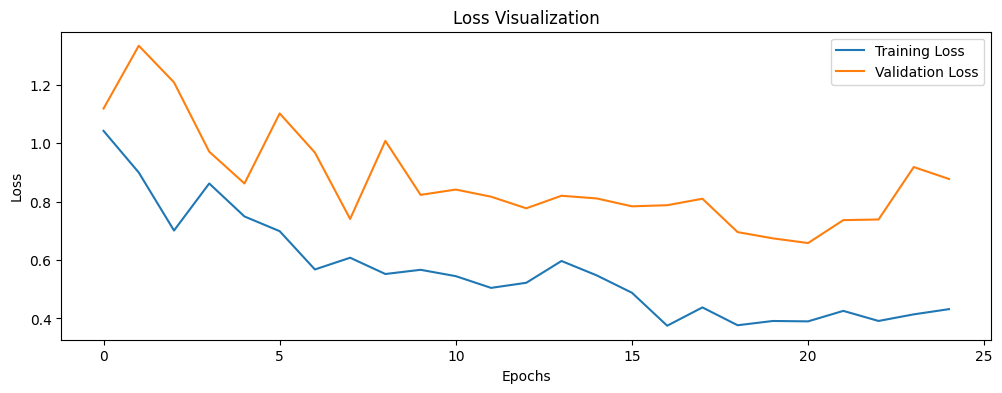

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

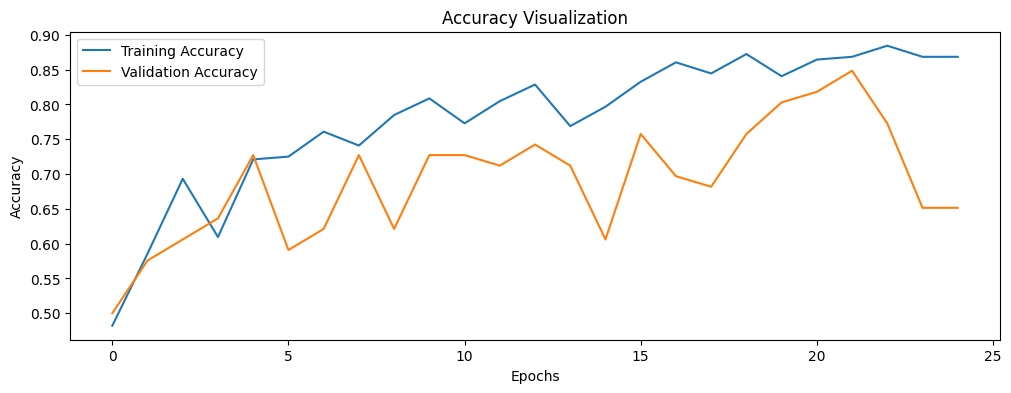

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [20]:
def image_predictor(img_path):
    img = load_img(img_path, target_size=(width, height))
    img_arr = img_to_array(img)
    img_norm = img_arr / 255.0
    img_flatten = np.expand_dims(img_norm, axis=0)
    pred = model.predict(img_flatten)
    predicted_class = classes[np.argmax(pred[0])]
    return predicted_class

In [21]:
image_predictor(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Normal\0120.jpeg")

1/1 [==============================] - 0s 191ms/step


'Normal'

In [22]:
image_predictor(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Covid\auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg")

1/1 [==============================] - 0s 59ms/step


'Covid'

In [23]:
image_predictor(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Viral Pneumonia\0103.jpeg")

1/1 [==============================] - 0s 65ms/step


'Normal'